In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

###### x_MLP/W12_L3(last lec.)-dip-iitm: [Multi Layer Perceptron Regressor on California Housing Dataset](https://www.youtube.com/watch?v=zsPNGpLFqgg&list=PLyGVjd4KQp13HB4vo0f_ztrpR8dPrDNKP&index=81)

# Neural networks model in scikit-learn
## MLP Regressor
MLPRegressor implements a multi-layer perceptron (MLP) that trains using backpropagation with no activation function in the output layer.

Therefore, it uses the square error as the loss function, and the output is a set of continuous values.

## imports

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sklearn
from sklearn import datasets

In [7]:
from sklearn.model_selection import train_test_split,\
    cross_validate, ShuffleSplit
from sklearn.neural_network import MLPRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_absolute_error,\
    mean_absolute_percentage_error

In [8]:
np.random.seed(306)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

## Load dataset

Let's use the California Housing dataset for the demo of MLPRegressor

In [14]:
dataset = sklearn.datasets.fetch_california_housing()
type(dataset)

sklearn.utils.Bunch

In [15]:
X, y = dataset.data, dataset.target

X_train, X_test, y_train, y_test = train_test_split(\
        X, y, test_size=0.2, random_state=1)

In [16]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(16512, 8) (16512,) (4128, 8) (4128,)


## Fit a pipeline to implement MLPRegressor on California housing dataset

Let's train a MLP regressor with three hidden layers each with 32 neurons.

In [17]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('regressor', MLPRegressor(hidden_layer_sizes=(32)))])

In [18]:
cv_results = cross_validate(pipe, 
                           X_train,
                           y_train,
                           cv=cv,
                           scoring="neg_mean_absolute_error",
                           return_train_score=True,
                           return_estimator=True,
                           n_jobs=2)

mlp_train_error = -1 * cv_results['train_score']
mlp_test_error = -1 * cv_results['test_score']

print(f"Mean absolute error of linear regression model on the train set:\n"
      f"{mlp_train_error.mean():.3f} +/- {mlp_train_error.std():.3f}")
print(f"Mean absolute error of linear regression model on the test set:\n"
      f"{mlp_test_error.mean():.3f} +/- {mlp_test_error.std():.3f}")


Mean absolute error of linear regression model on the train set:
0.382 +/- 0.005
Mean absolute error of linear regression model on the test set:
0.386 +/- 0.008


In [19]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', MLPRegressor(hidden_layer_sizes=32))])

In [20]:
mean_absolute_percentage_error(y_train, pipe.predict(X_train))

0.20517616916407086

In [21]:
mean_absolute_percentage_error(y_test, pipe.predict(X_test))

0.21680164186883186

Text(0, 0.5, 'predicted')

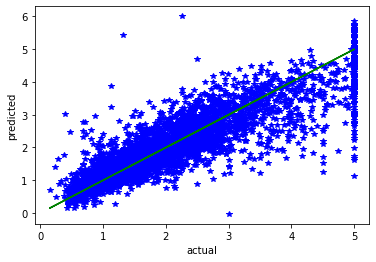

In [22]:
plt.plot(y_test, pipe.predict(X_test), 'b*')
plt.plot(y_test, y_test, 'g-')
plt.xlabel('actual')
plt.ylabel('predicted')